# Q1: Setup & Exploration

**Phase 1-2:** Project Setup, Data Exploration  
**Points: 6 points**

**Focus:** Load data, perform initial inspection, identify data quality issues.

**Lecture Reference:** Lecture 11, Notebook 1 ([`11/demo/01_setup_exploration_cleaning.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/01_setup_exploration_cleaning.ipynb)), Phases 1-2. Also see Lecture 04 (pandas I/O) and Lecture 07 (visualization).

---

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

# Create output directory
os.makedirs('output', exist_ok=True)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

---

## Objective

Load the Chicago Beach Weather Sensors dataset, perform initial inspection, and identify data quality issues.

**Note:** The datetime column in this dataset is named `Measurement Timestamp`.

**Time Series Note:** Unlike the lecture's NYC Taxi data (event-based), this dataset is **time-series data** with continuous sensor readings. The data is already indexed by time, so you'll work with datetime-indexed dataframes throughout. See **Lecture 09** for time series operations. For time series visualizations, you may want to use pandas `resample()` to aggregate data (e.g., daily averages) for clearer visualization of long-term trends.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q1_data_info.txt`
**Format:** Plain text file
**Content:** Dataset information including:
- Dataset shape (rows × columns)
- Column names (one per line or comma-separated)
- Data types for each column
- Date range (start date and end date) - **REQUIRED if temporal data**
- Missing value counts for each column (column name: count)

**Example format:**
```
Dataset Shape: 50000 rows × 10 columns

Column Names:
- Measurement Timestamp
- Beach
- Water Temperature
- Air Temperature
...

Data Types:
- Measurement Timestamp: datetime64[ns]
- Beach: object
- Water Temperature: float64
...

Date Range:
Start: 2022-01-01 00:00:00
End: 2027-09-15 07:00:00

Missing Values:
- Water Temperature: 2500 (5.0%)
- Air Temperature: 1500 (3.0%)
...
```

### 2. `output/q1_exploration.csv`
**Format:** CSV file
**Required Columns (exact names):** `column_name`, `mean`, `std`, `min`, `max`, `missing_count`
**Content:** One row per numeric column in the dataset
- `column_name`: Name of the numeric column
- `mean`: Mean value (float)
- `std`: Standard deviation (float)
- `min`: Minimum value (float)
- `max`: Maximum value (float)
- `missing_count`: Number of missing values (integer)

**Example:**
```csv
column_name,mean,std,min,max,missing_count
Water Temperature,15.23,5.12,0.5,28.7,2500
Air Temperature,18.45,8.23,-5.2,35.8,1500
Wind Speed,6.78,4.56,0.1,25.3,0
```

### 3. `output/q1_visualizations.png`
**Format:** PNG image file
**Content:** At least 2 plots in a single figure (use subplots)
**Required plots:**
1. **Distribution plot:** Histogram or density plot of at least one numeric variable
2. **Time series plot:** Line plot showing a numeric variable over time (if temporal data)

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

---

## Requirements Checklist

- [ ] Data loaded successfully from `data/beach_sensors.csv`
- [ ] Initial inspection completed (shape, info, head, describe)
- [ ] Missing values identified and counted
- [ ] Basic visualizations created (at least 2 plots: distribution + time series)
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Load and inspect the dataset** - Use standard pandas I/O and inspection methods
2. **Parse datetime** - Identify and convert datetime column(s)
3. **Identify missing values** - Count and calculate percentages per column
4. **Create visualizations** - Distribution plot + time series plot (use subplots)
5. **Save artifacts** - Write to the three required output files

---

## Decision Points

- **Visualization choices:** What types of plots best show your data? See Lecture 11 Notebook 1 for examples.
- **Data quality assessment:** What issues do you see? Missing data patterns? Outliers? Inconsistent formats? Document these for Q2.

---

## Checkpoint

After Q1, you should have:
- [ ] Data loaded successfully
- [ ] Basic statistics calculated
- [ ] Initial visualizations created (2+ plots)
- [ ] Data quality issues identified
- [ ] All 3 artifacts saved: `q1_data_info.txt`, `q1_exploration.csv`, `q1_visualizations.png`

---

**Next:** Continue to `q2_data_cleaning.md` for Data Cleaning.


In [2]:
# Check for data file (downloaded by download_data.sh)
data_file = 'data/beach_sensors.csv'
#check if file exists 
if not os.path.exists(data_file):
    print("### Data File Not Found")
    print("Please run `download_data.sh` to download the data:") 
    print("chmod +x download_data.sh")
    print("./download_data.sh")
print(f"Loading data from: {data_file}")
if not os.path.exists(data_file):
   raise FileNotFoundError(f"Chicago Beach Weather Sensors data file not found: {data_file}. Run download_data.sh first.")
#load the dataset 
df =pd.read_csv(data_file)
#number of rows
print(f"Loaded CSV file with {len(df)}rows")
print(f"Dataset shape: {df.shape}")
# display first few rows 
print(f"First few rows of the dataset:")
print(df.head())
#column names 
print(f"Column names in the dataset:")
print(df.columns.tolist())
# Display Datatypes 
print(f"Datatypes of each column:")
print(df.dtypes)
#date range 
start_date =df ['Measurement Timestamp'].min()
end_date = df ['Measurement Timestamp'].max()
print(f"Date Range")
print(f"Start: {start_date}")
print(f"End: {end_date}")
#print(f"Date range in the dataset:")
#print(f"From {df['Measurement Timestamp'].min()} to {df['Measurement Timestamp'].max()}")
#missing values

print ("Missing Values")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct.round(2)
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) == 0:
    print("No missing values found in the dataset")
else:
    print(missing_df)

#save as output/q1_data_info.txt
with open('output/q1_data_info.txt', 'w') as f:
    f.write("### Chicago Beach Weather Sensor Data Information:\n")
    f.write(f"Loaded CSV file with {len(df)}rows")
    f.write(f"Dataset shape: {df.shape}")
    f.write(f"First few rows of the dataset:\n")
    f.write(df.head().to_string())
    f.write(f"\nColumn names in the dataset:\n")
    f.write(str(df.columns.tolist()))
    f.write(f"Datatypes of each column:")
    f.write(str(df.dtypes))
    f.write(f"\nDate Range:\n")
    f.write(f"Start: {start_date}:\n")
    f.write(f"End: {end_date}:\n")
    f.write(f"Date range in the dataset:")
    f.write(f"From {df['Measurement Timestamp'].min()} to {df['Measurement Timestamp'].max()}")
    f.write("\nMissing Values:\n")
    f.write(missing_df.to_string())

    
            




Loading data from: data/beach_sensors.csv
Loaded CSV file with 196369rows
Dataset shape: (196369, 18)
First few rows of the dataset:
                  Station Name   Measurement Timestamp  Air Temperature  \
0  63rd Street Weather Station  09/27/2018 10:00:00 AM            16.40   
1  63rd Street Weather Station  09/27/2018 11:00:00 AM            17.10   
2  63rd Street Weather Station  09/27/2018 01:00:00 PM            18.20   
3       Foster Weather Station  09/27/2018 01:00:00 PM            17.89   
4  63rd Street Weather Station  09/27/2018 03:00:00 PM            19.50   

   Wet Bulb Temperature  Humidity  Rain Intensity  Interval Rain  Total Rain  \
0                  12.2        61             0.0            0.0       260.3   
1                  11.5        51             0.0            0.0       260.3   
2                  12.4        51             0.0            0.0       260.3   
3                   NaN        39             NaN            0.0         NaN   
4               

In [3]:
### 2. `output/q1_exploration.csv`
#from IPython.display import Markdown,display
#display(Markdown("#Summary Statistics"))
#summary statistics for numeric columns 
print("### Summary Statistics for Numeric Columns")
#numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
#transpose for easier reading, many columns
stats_df = df[numeric_cols].describe().T
stats_df = stats_df.round(2)  # Round for readability
#coumn name as a column
stats_df = stats_df.reset_index()
stats_df = stats_df.rename(columns = {'index' : 'Column Name'})
display(stats_df)
#save as csv
stats_df.to_csv('output/q1_exploration.csv',index = False)

### Summary Statistics for Numeric Columns


,Column Name,count,mean,std,min,25%,50%,75%,max
0,Air Temperature,196294.0,12.62,10.44,-29.78,4.3,13.7,21.5,37.60
1,Wet Bulb Temperature,120394.0,10.27,9.41,-28.90,3.0,11.6,18.4,28.40
2,Humidity,196369.0,68.02,15.63,0.00,57.0,69.0,80.0,100.00
3,Rain Intensity,120394.0,0.16,1.79,0.00,0.0,0.0,0.0,183.60
4,Interval Rain,196369.0,0.14,1.10,-0.90,0.0,0.0,0.0,63.42
5,Total Rain,120394.0,141.47,190.44,0.00,16.7,55.5,200.5,1056.10
6,Precipitation Type,120394.0,4.27,15.59,0.00,0.0,0.0,0.0,70.00
7,Wind Direction,196369.0,140.80,122.02,0.00,10.0,115.0,260.0,359.00
8,Wind Speed,196369.0,2.92,5.34,0.00,1.6,2.9,3.3,999.90
9,Maximum Wind Speed,196369.0,3.56,5.95,0.00,1.2,3.1,5.2,999.90


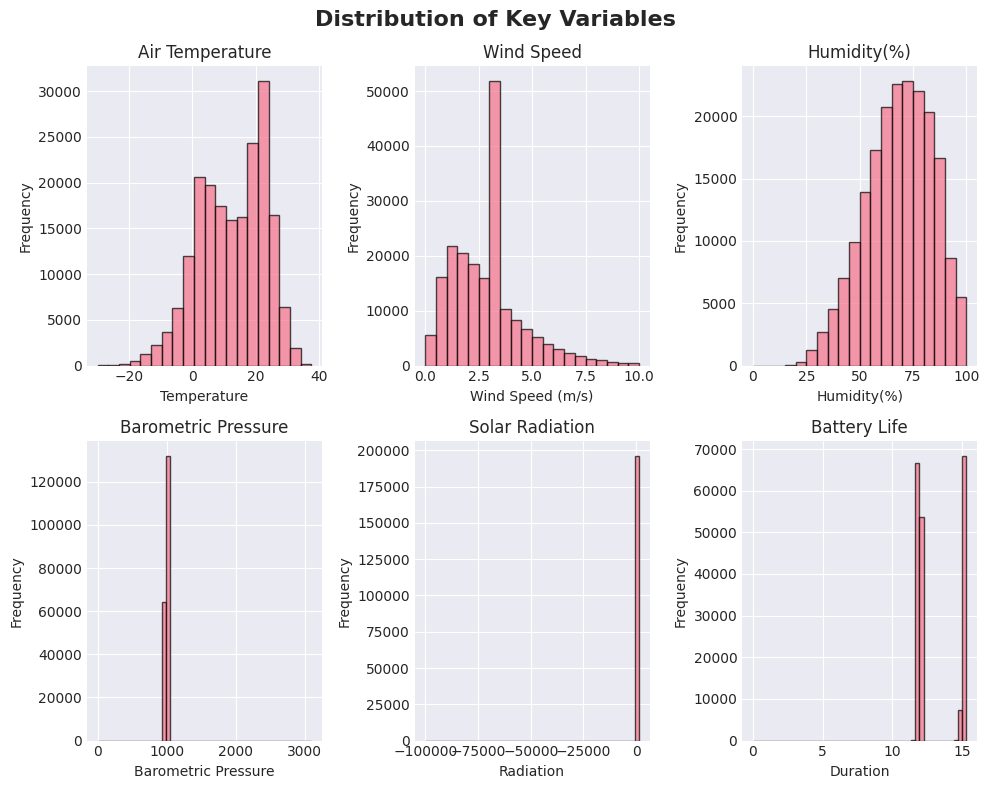

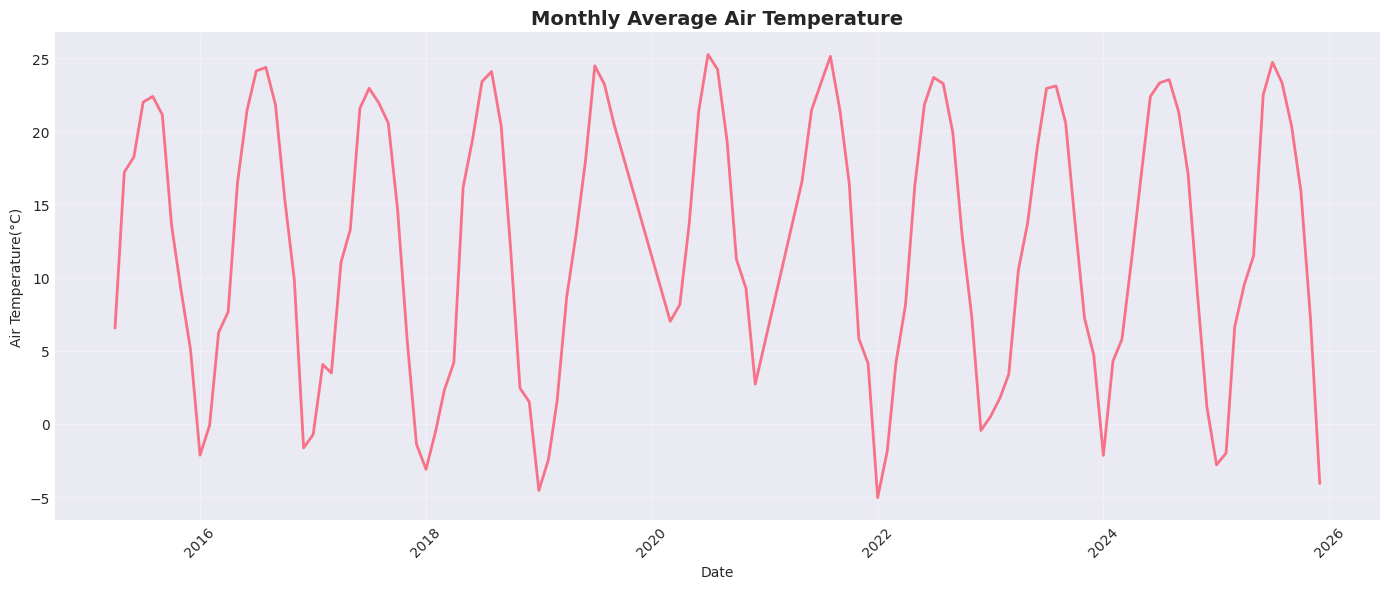

In [11]:
### 3. `output/q1_visualizations.png`
#Visualizations:Distribution of key numeric variables (subplots)
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle('Distribution of Key Variables', fontsize=16, fontweight='bold')

# AirTemperature
axes[0, 0].hist(df['Air Temperature'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Air Temperature')
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_ylabel('Frequency')

# Wind (m/s)
axes[0, 1].hist(df['Wind Speed'],bins= np.arange(0, 10.5, 0.5),edgecolor='black', alpha=0.7)
#bins=range(int(df['Wind Speed'].min()), int(df['Wind Speed'].max())+2), edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Wind Speed')
axes[0, 1].set_xlabel('Wind Speed (m/s)')
axes[0, 1].set_ylabel('Frequency')

# Humidity(%)
#humidity_nonzero = df['Humidity'] [df['Humidity']>0] #remove zeros 
humidity_nonzero = df['Humidity'].dropna()                                                              
axes[0, 2].hist(df['Humidity'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Humidity(%)')
axes[0,2].set_xlabel('Humidity(%)')
axes[0, 2].set_ylabel('Frequency')

# Brometric Pressure
pressure_nonzero = df['Barometric Pressure'].dropna()                                                               
axes[1, 0].hist(df['Barometric Pressure'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Barometric Pressure')
axes[1, 0].set_xlabel('Barometric Pressure')
axes[1, 0].set_ylabel('Frequency')

# Solar Radiation 
axes[1, 1].hist(df['Solar Radiation'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Solar Radiation')
axes[1, 1].set_xlabel('Radiation')
axes[1, 1].set_ylabel('Frequency')

# Battery life 
axes[1, 2].hist(df['Battery Life'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 2].set_title('Battery Life')
axes[1, 2].set_xlabel('Duration')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
#save visualizations

#time -series plot 
# Plot ri temperature over time to see temporal patterns
df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'],errors= 'coerce')
#df['Measurement Timestamp'] = df['Measurement Timestamp'].dt.date
#daily_temp = df.groupby('Measurement Timestamp') ['Air Temperature'].mean()
#monthly_temp = df['Air Temperature'].resample('M').mean()
df.set_index('Measurement Timestamp')
monthly_temp = df.groupby(df['Measurement Timestamp'].dt.to_period('M'))['Air Temperature'].mean()
monthly_temp.index = monthly_temp.index.to_timestamp()
plt.figure(figsize=(14, 6))
plt.plot(monthly_temp.index, monthly_temp.values, linewidth=2)
plt.title('Monthly Average Air Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Air Temperature(°C)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
#save visualizations





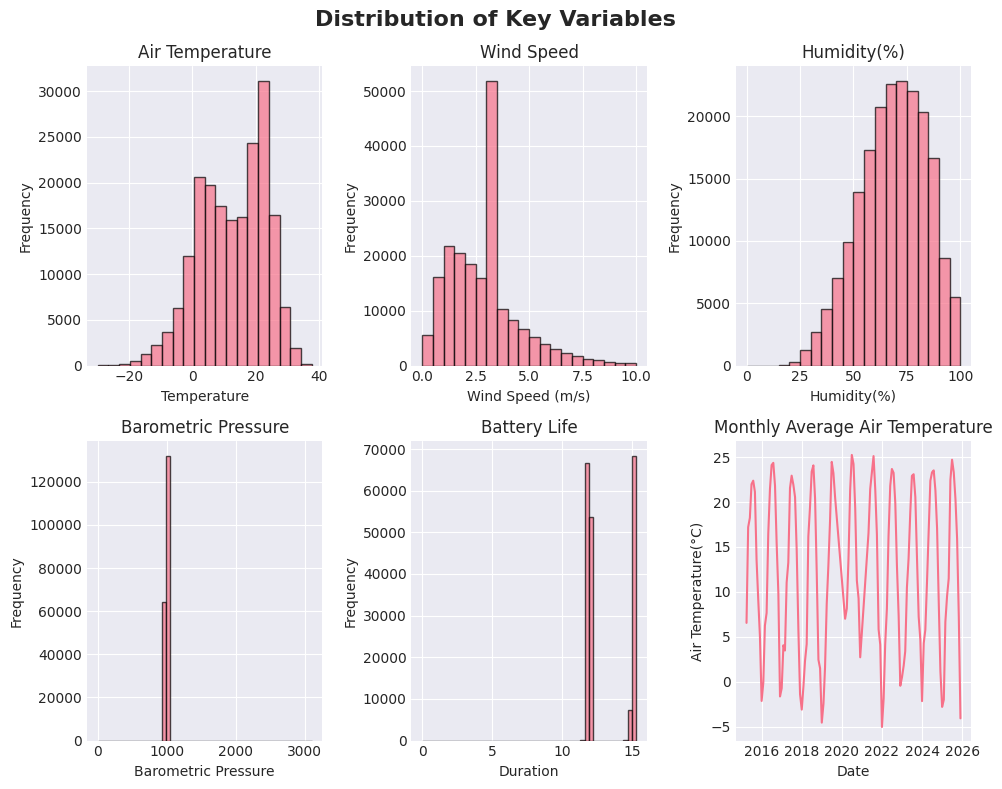

In [12]:
### 3. `output/q1_visualizations.png`
#Visualizations:Distribution of key numeric variables (subplots)
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle('Distribution of Key Variables', fontsize=16, fontweight='bold')

# AirTemperature
axes[0, 0].hist(df['Air Temperature'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Air Temperature')
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_ylabel('Frequency')

# Wind (m/s)
axes[0, 1].hist(df['Wind Speed'],bins= np.arange(0, 10.5, 0.5),edgecolor='black', alpha=0.7)
#bins=range(int(df['Wind Speed'].min()), int(df['Wind Speed'].max())+2), edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Wind Speed')
axes[0, 1].set_xlabel('Wind Speed (m/s)')
axes[0, 1].set_ylabel('Frequency')

# Humidity(%)
#humidity_nonzero = df['Humidity'] [df['Humidity']>0] #remove zeros 
humidity_nonzero = df['Humidity'].dropna()                                                              
axes[0, 2].hist(df['Humidity'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Humidity(%)')
axes[0,2].set_xlabel('Humidity(%)')
axes[0, 2].set_ylabel('Frequency')

# Brometric Pressure
pressure_nonzero = df['Barometric Pressure'].dropna()                                                               
axes[1, 0].hist(df['Barometric Pressure'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Barometric Pressure')
axes[1, 0].set_xlabel('Barometric Pressure')
axes[1, 0].set_ylabel('Frequency')

# Solar Radiation 
#time -series plot 
# Plot ri temperature over time to see temporal patterns
df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'],errors= 'coerce')
df.set_index('Measurement Timestamp')
monthly_temp = df.groupby(df['Measurement Timestamp'].dt.to_period('M'))['Air Temperature'].mean()
monthly_temp.index = monthly_temp.index.to_timestamp()
#plot 
axes[1, 2].plot(monthly_temp.index, monthly_temp.values)
axes[1, 2].set_title('Monthly Average Air Temperature')               
axes[1, 2].set_xlabel ('Date')
axes[1, 2].set_ylabel('Air Temperature(°C)')

# Battery life 
axes[1, 1].hist(df['Battery Life'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Battery Life')
axes[1, 1].set_xlabel('Duration')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
#save visualizations
fig.savefig('output/q1_visualizations.png',dpi=300)